In [1]:
# This project will focus on the data on war deaths in Ukraine 2018 - 2022 years. 
# Data taken from: https://data.humdata.org/dataset/ukraine-acled-conflict-data#
# The last time the data has been updated in Aprin 2022, so it's quite recent
# I answered questions: 
# 1) How many deaths were there in 2018, 2019, 2020, 2021, and the beginning of 2022. 
# 2) Build a graph showing number of deaths divided by years

In [2]:
import numpy as np  
import pandas as pd

In [3]:
df_ua = pd.read_excel(r'ukraine_political_violence_events_and_fatalities_by_month-year.xlsx', sheet_name='Data')

In [4]:
df_ua.tail()

,Country,Year,Month,Events,Fatalities
47,Ukraine,2021,December,545,4
48,Ukraine,2022,January,426,7
49,Ukraine,2022,February,1377,448
50,Ukraine,2022,March,2050,4267
51,Ukraine,2022,April,1223,1498


In [5]:
# descriptive stats
df_ua.describe()

,Year,Events,Fatalities
count,52.000000,52.000000,52.000000
mean,2019.692308,942.230769,148.903846
std,1.276307,411.235948,619.970975
min,2018.000000,122.000000,4.000000
25%,2019.000000,625.000000,10.750000
50%,2020.000000,1049.500000,20.500000
75%,2021.000000,1228.750000,51.250000
max,2022.000000,2050.000000,4267.000000


In [6]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [11]:
df_ua['Total'] =df_ua.sum(axis=1)

C:\Users\nisti\AppData\Local\Temp/ipykernel_15936/4251869495.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_ua['Total'] =df_ua.sum(axis=1)


In [12]:
# Group data by year
df_ua_year = df_ua.groupby('Year', axis=0).sum()
df_ua_year

,Events,Fatalities,Total
Year,,,
2018,13335,872,76846
2019,14861,389,78956
2020,8434,113,65574
2021,7290,149,63382
2022,5076,6220,38768


In [13]:
print(type(df_ua.groupby('Year', axis=0)))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


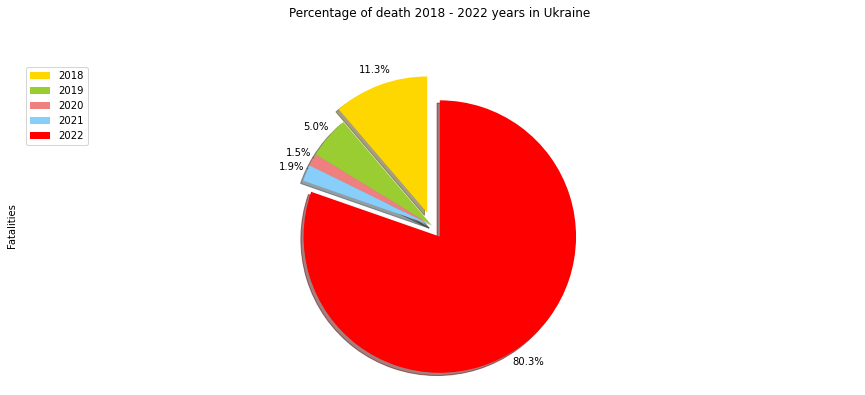

In [15]:
# Build a pie chart of percentage of death 2018 - 2022 years in Ukraine
colors_list =['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'red']
explode_list = [0.1, 0 , 0, 0, 0.1]
df_ua_year['Fatalities'].plot(kind='pie',
                           figsize=(15,6),
                           autopct='%1.1f%%',   # add in percentages
                           startangle=90,       # start angle 90 (Africa)
                           shadow=True,         # add shadow
                           labels=None,         # take off labels on pie chart
                           pctdistance=1.12,    # add the ratio between the center of each pie slice 
                                                # and the start of the text generated by autopct
                           colors=colors_list,  # add custom colors
                           explode=explode_list, # 'explode' lowest 3 continents
                           )
plt.title('Percentage of death 2018 - 2022 years in Ukraine', y =1.12)

plt.axis('equal')   #set the pie to look like a circle

plt.legend(labels=df_ua_year.index, loc='upper left')

plt.show()
# Conclusion: 2022 year has just started, so the data represents casualties for only a couple of months.
# 80% of all war deaths in Ukraine within the last 4 years happened in the past 3 months of 2022

In [35]:
ax1 = fig.add_subplot(1, 2, 2) 

In [36]:
# Let's look at what the life graph fpr that would look like
fig = plt.figure() # create figure

df_ua.plot(kind='line', figsize=(20, 6), ax=ax1) 
ax1.set_title ('War deaths in Ukraine 2018- 2022')
ax1.set_ylabel('Fatalities')
ax1.set_xlabel('Years')

plt.show()

<Figure size 432x288 with 0 Axes>